<a href="https://colab.research.google.com/github/Ankam123niteesh/2303A52341_SML/blob/main/2303A52341_SML_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
data=pd.read_csv('/content/fetal_health.csv')
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [ ]:
data.isnull()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2123,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2124,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
y= data['fetal_health']
print(y)

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: fetal_health, Length: 2126, dtype: float64


In [ ]:
x=data.drop('fetal_health', axis=1)
print(x)

      baseline value  accelerations  fetal_movement  uterine_contractions  \
0              120.0          0.000           0.000                 0.000   
1              132.0          0.006           0.000                 0.006   
2              133.0          0.003           0.000                 0.008   
3              134.0          0.003           0.000                 0.008   
4              132.0          0.007           0.000                 0.008   
...              ...            ...             ...                   ...   
2121           140.0          0.000           0.000                 0.007   
2122           140.0          0.001           0.000                 0.007   
2123           140.0          0.001           0.000                 0.007   
2124           140.0          0.001           0.000                 0.006   
2125           142.0          0.002           0.002                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  

In [ ]:
nor=(x-x.min())/(x.max()-x.min())
nor

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,0.259259,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.813333,0.044118,0.472527,...,0.344633,0.110092,0.034483,0.111111,0.0,0.472441,0.587156,0.403670,0.271375,1.0
1,0.481481,0.315789,0.000000,0.400000,0.2,0.0,0.0,0.066667,0.279412,0.000000,...,0.717514,0.165138,0.655172,0.333333,0.1,0.637795,0.577982,0.577982,0.044610,0.5
2,0.500000,0.157895,0.000000,0.533333,0.2,0.0,0.0,0.053333,0.279412,0.000000,...,0.717514,0.165138,0.655172,0.277778,0.1,0.637795,0.568807,0.559633,0.048327,0.5
3,0.518519,0.157895,0.000000,0.533333,0.2,0.0,0.0,0.053333,0.323529,0.000000,...,0.644068,0.027523,0.413793,0.611111,0.0,0.606299,0.559633,0.550459,0.048327,1.0
4,0.481481,0.368421,0.000000,0.533333,0.0,0.0,0.0,0.053333,0.323529,0.000000,...,0.644068,0.027523,0.413793,0.500000,0.0,0.606299,0.577982,0.559633,0.040892,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,0.629630,0.000000,0.000000,0.466667,0.0,0.0,0.0,0.893333,0.000000,0.274725,...,0.209040,0.798165,0.474138,0.222222,0.0,0.732283,0.706422,0.688073,0.007435,0.5
2122,0.629630,0.052632,0.000000,0.466667,0.0,0.0,0.0,0.880000,0.029412,0.241758,...,0.355932,0.486239,0.405172,0.333333,0.0,0.724409,0.688073,0.678899,0.011152,1.0
2123,0.629630,0.052632,0.000000,0.466667,0.0,0.0,0.0,0.893333,0.029412,0.219780,...,0.361582,0.486239,0.413793,0.277778,0.0,0.732283,0.688073,0.688073,0.014870,1.0
2124,0.629630,0.052632,0.000000,0.400000,0.0,0.0,0.0,0.880000,0.029412,0.296703,...,0.355932,0.486239,0.405172,0.333333,0.0,0.724409,0.678899,0.678899,0.014870,1.0


In [ ]:
for clo in data.columns:
  print(data[clo].value_counts())
  print()
  print()
  print()

baseline value
133.0    136
130.0    111
122.0    109
138.0    103
125.0     91
128.0     85
120.0     78
142.0     77
144.0     77
132.0     76
136.0     72
140.0     70
134.0     67
135.0     65
146.0     62
127.0     60
137.0     59
129.0     57
131.0     56
143.0     56
123.0     56
148.0     52
121.0     44
139.0     39
141.0     39
126.0     38
145.0     37
115.0     28
150.0     26
110.0     21
149.0     18
119.0     17
152.0     17
112.0     16
147.0     14
151.0     14
159.0     12
114.0     11
158.0     10
124.0     10
118.0      9
154.0      8
106.0      7
116.0      5
157.0      4
156.0      4
117.0      2
160.0      1
Name: count, dtype: int64



accelerations
0.000    894
0.003    161
0.002    160
0.001    143
0.004    117
0.006    112
0.005    110
0.008    103
0.007     91
0.009     60
0.010     50
0.011     36
0.012     24
0.013     22
0.014     20
0.015      9
0.016      7
0.017      4
0.018      2
0.019      1
Name: count, dtype: int64



fetal_movement
0.000    1311


In [ ]:
for clo in x.columns:
  print(x[clo].unique())
  print()
  print()
  print()

[120. 132. 133. 134. 122. 151. 150. 131. 130. 129. 128. 124. 115. 114.
 116. 158. 156. 148. 149. 146. 144. 142. 136. 141. 138. 140. 154. 145.
 139. 125. 123. 159. 143. 119. 121. 127. 126. 118. 135. 137. 147. 157.
 117. 152. 112. 106. 110. 160.]



[0.    0.006 0.003 0.007 0.001 0.005 0.009 0.002 0.008 0.004 0.01  0.015
 0.013 0.014 0.011 0.017 0.012 0.016 0.019 0.018]



[0.    0.072 0.222 0.408 0.38  0.441 0.383 0.451 0.469 0.34  0.425 0.334
 0.135 0.099 0.108 0.112 0.089 0.103 0.085 0.109 0.079 0.065 0.055 0.058
 0.047 0.038 0.012 0.018 0.02  0.005 0.003 0.006 0.001 0.004 0.009 0.01
 0.002 0.008 0.007 0.028 0.026 0.107 0.013 0.016 0.029 0.05  0.053 0.011
 0.015 0.022 0.021 0.017 0.019 0.025 0.014 0.024 0.023 0.035 0.054 0.03
 0.048 0.088 0.043 0.052 0.091 0.033 0.092 0.084 0.115 0.041 0.04  0.027
 0.031 0.063 0.06  0.071 0.306 0.298 0.139 0.189 0.157 0.235 0.36  0.455
 0.443 0.47  0.477 0.446 0.481 0.369 0.335 0.43  0.346 0.323 0.375 0.353
 0.045 0.032 0.051 0.036 0.037 0.049]



[0.

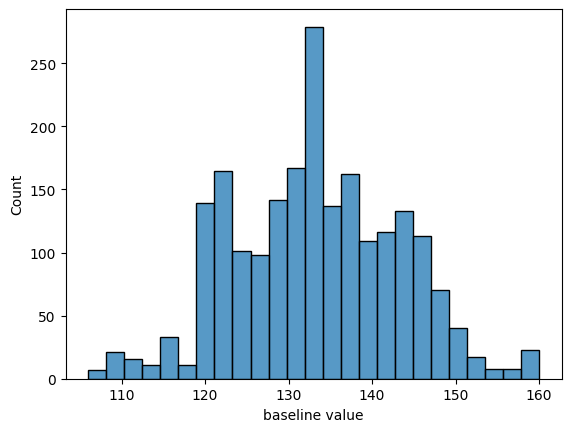

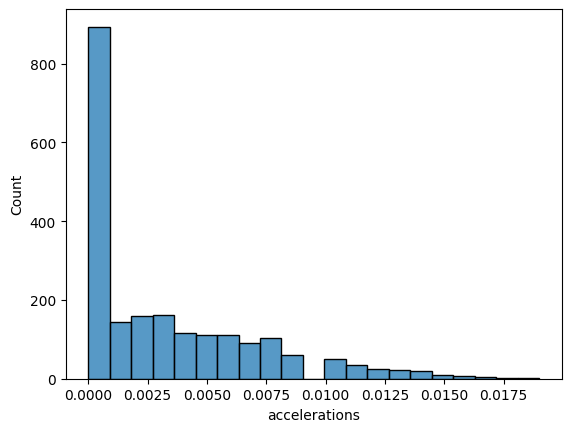

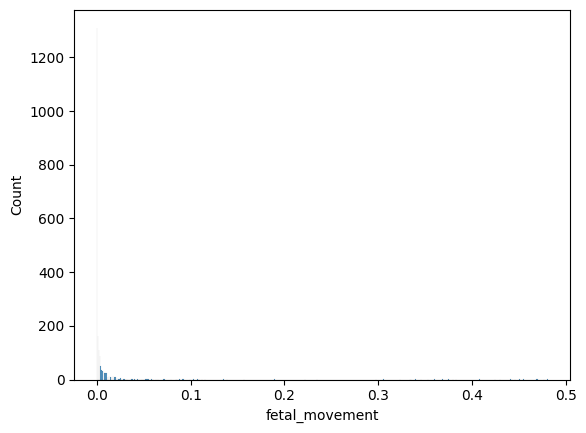

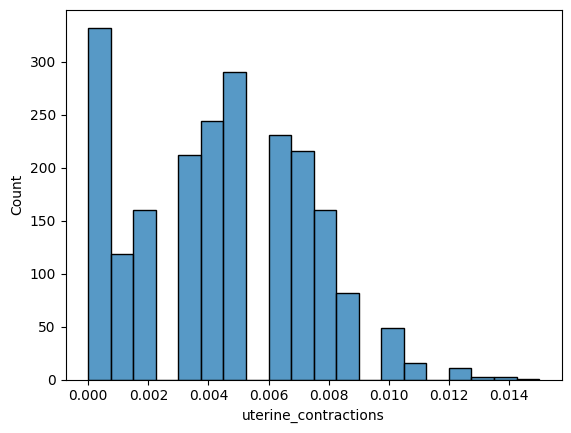

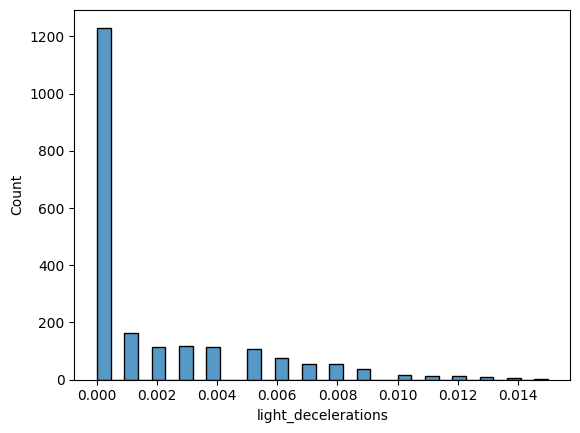

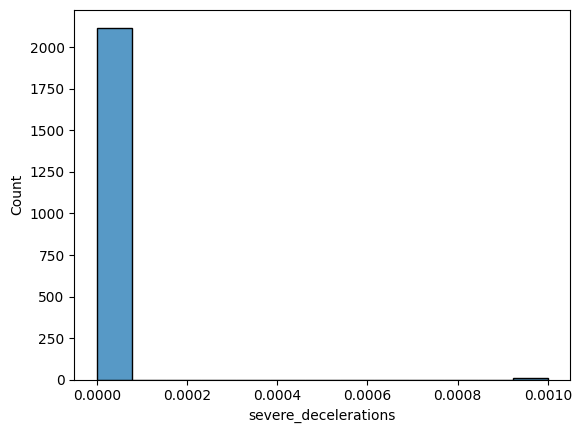

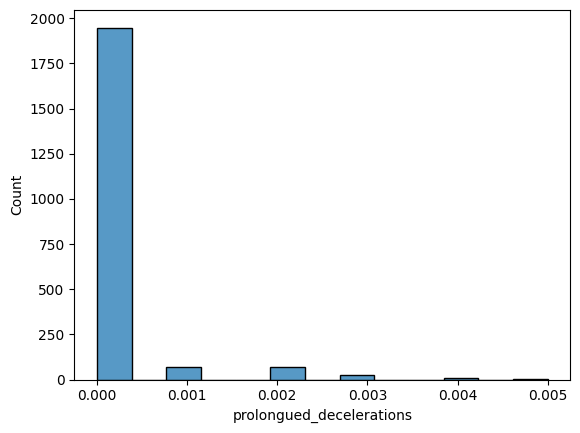

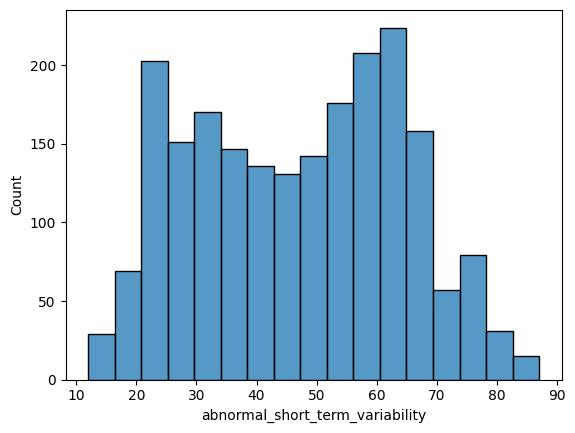

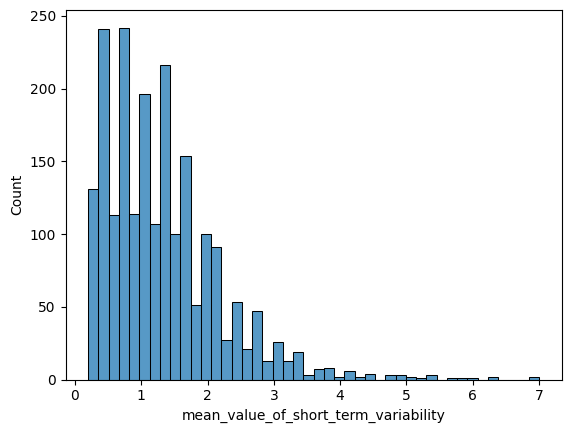

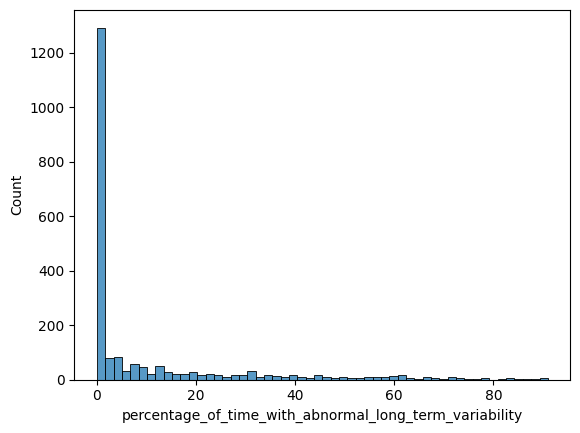

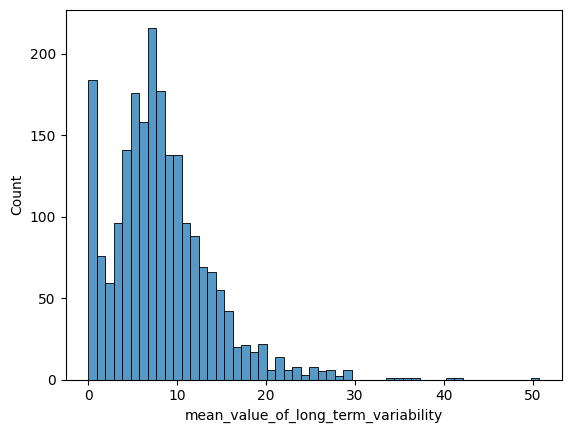

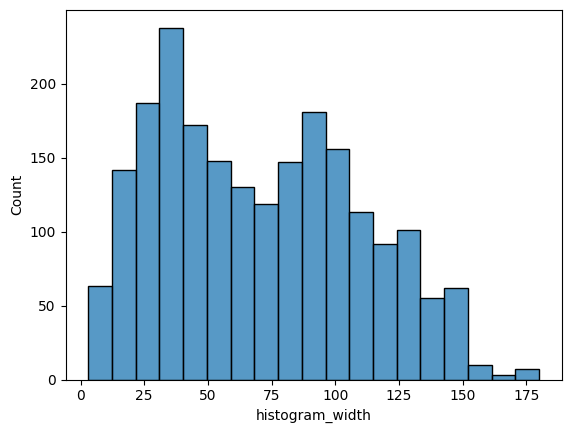

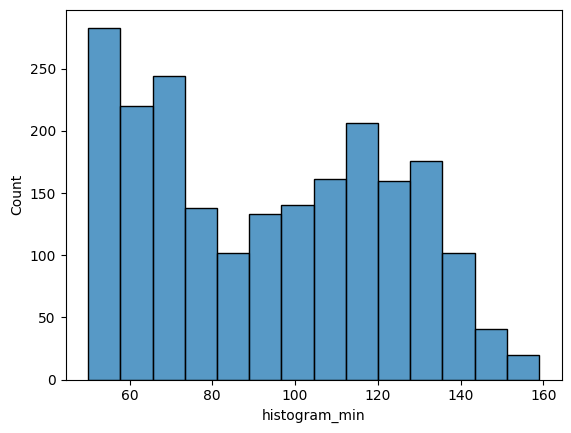

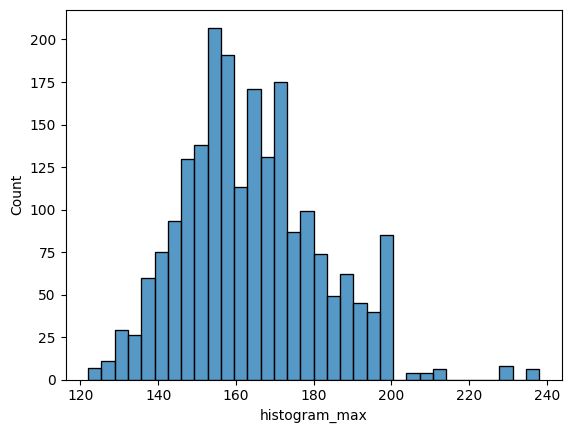

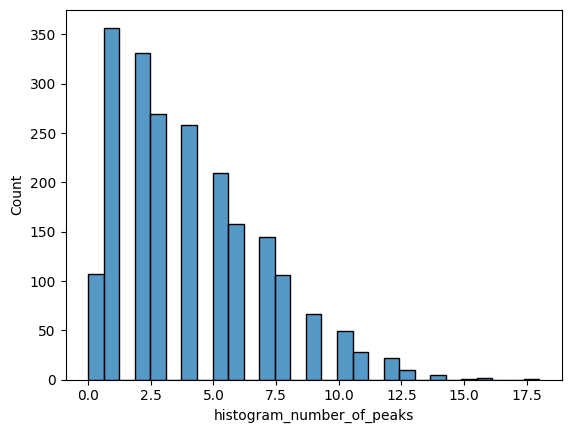

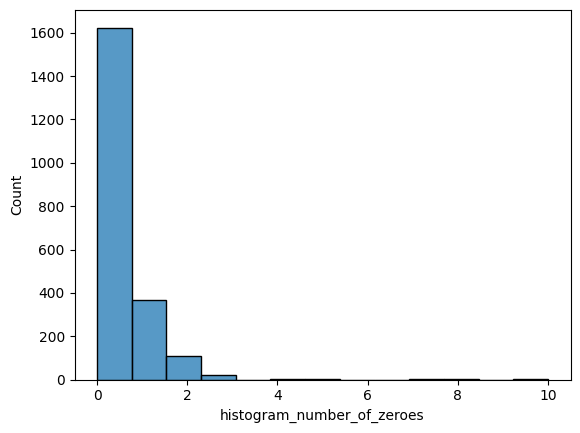

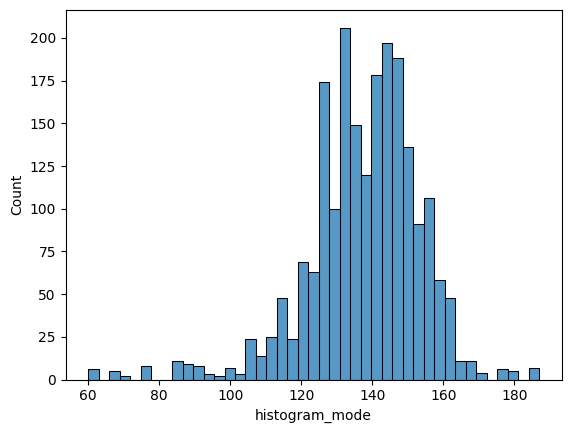

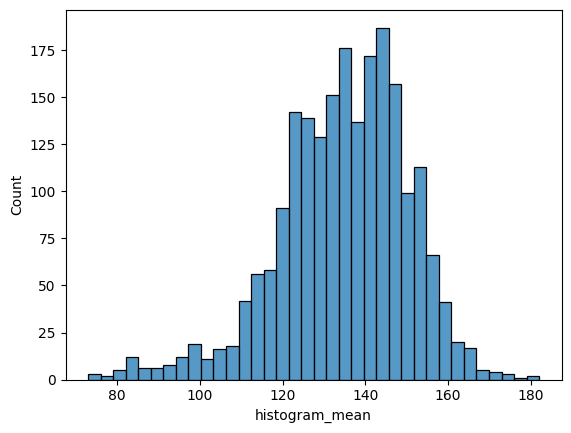

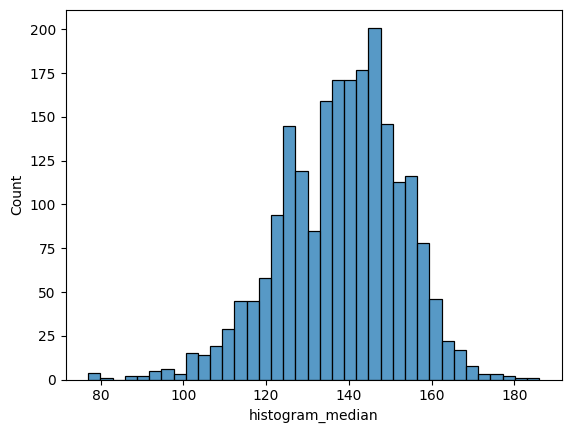

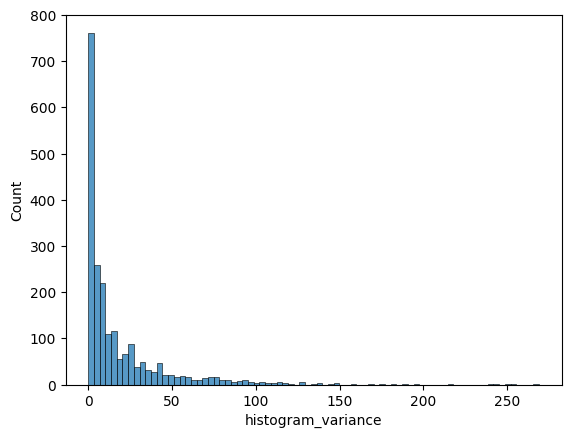

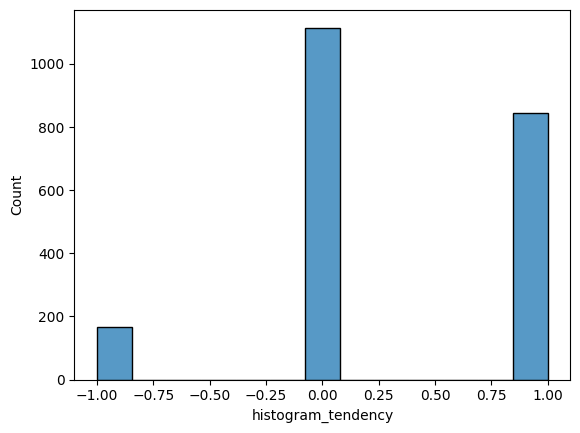

In [ ]:
for clo in x.columns:
  if x[clo].dtype == 'int64':
    sns.histplot(x[clo], discrete=True)
  elif x[clo].dtype == 'float64':
    sns.histplot(x[clo])
    plt.show()

In [ ]:
x.corr()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,...,-0.147679,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,...,0.298631,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,...,0.162790,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,...,0.142541,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,...,0.520467,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,...,0.044880,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,...,0.265391,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,...,-0.260463,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,...,0.660847,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,...,-0.451297,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
x_train

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
1233,125.0,0.000,0.000,0.008,0.000,0.0,0.000,32.0,1.1,3.0,...,51.0,96.0,147.0,4.0,0.0,126.0,125.0,127.0,2.0,0.0
480,140.0,0.000,0.000,0.001,0.000,0.0,0.000,60.0,0.8,32.0,...,120.0,79.0,199.0,9.0,0.0,141.0,141.0,142.0,3.0,0.0
1111,122.0,0.000,0.000,0.000,0.001,0.0,0.000,20.0,1.8,0.0,...,39.0,103.0,142.0,1.0,0.0,120.0,119.0,121.0,3.0,0.0
1303,137.0,0.005,0.000,0.005,0.002,0.0,0.000,36.0,0.9,0.0,...,63.0,115.0,178.0,4.0,0.0,148.0,148.0,149.0,9.0,0.0
861,142.0,0.003,0.000,0.004,0.000,0.0,0.000,46.0,0.7,27.0,...,26.0,133.0,159.0,1.0,0.0,150.0,148.0,150.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,130.0,0.009,0.001,0.004,0.001,0.0,0.000,52.0,1.3,0.0,...,99.0,73.0,172.0,6.0,0.0,144.0,141.0,144.0,16.0,1.0
1095,123.0,0.012,0.000,0.002,0.000,0.0,0.000,22.0,2.2,0.0,...,52.0,100.0,152.0,2.0,0.0,131.0,132.0,133.0,4.0,0.0
1130,122.0,0.005,0.000,0.004,0.005,0.0,0.000,20.0,2.6,0.0,...,98.0,60.0,158.0,6.0,0.0,131.0,121.0,126.0,31.0,0.0
1294,115.0,0.003,0.000,0.008,0.002,0.0,0.001,24.0,1.6,0.0,...,108.0,71.0,179.0,3.0,2.0,133.0,122.0,129.0,45.0,0.0


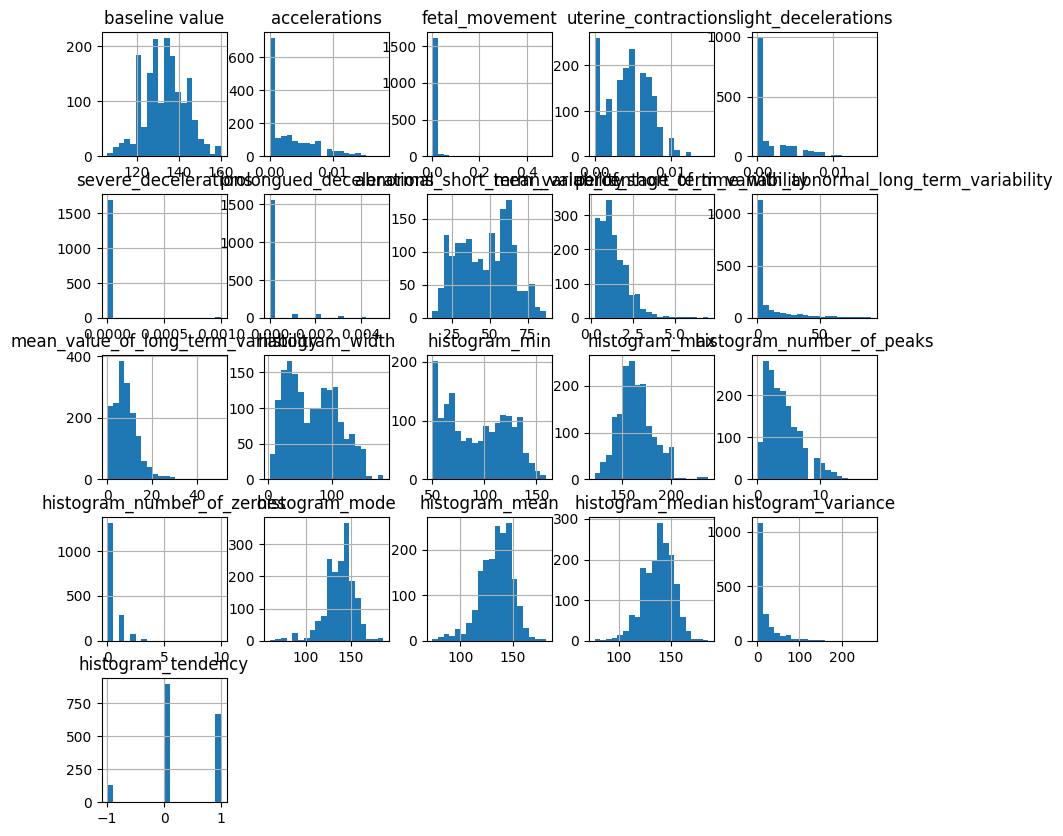

In [ ]:
x_train.hist(bins=20, figsize=(10,10))
plt.show()

PERCEPTRON

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay,roc_curve,auc,precision_recall_curve
from sklearn.linear_model import Perceptron
pm=Perceptron()
pm.fit(x_train,y_train)


Perceptron()

In [ ]:
yp=pm.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test,yp)
print(cm)

[[309  24   0]
 [ 22  42   0]
 [ 11  14   4]]


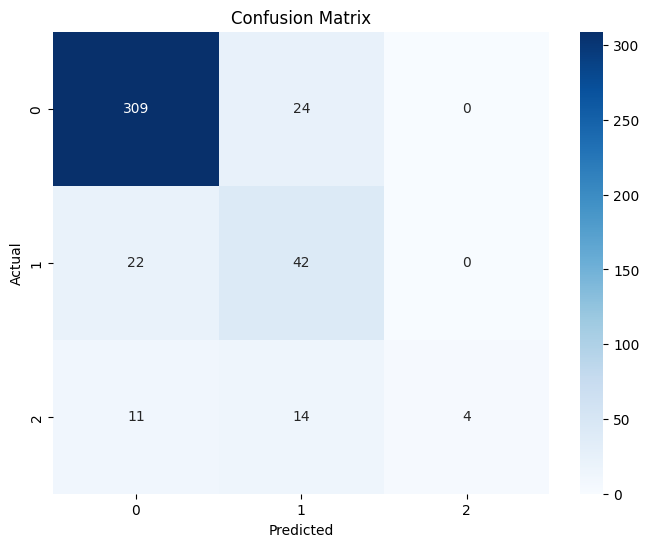

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

         1.0       0.90      0.93      0.92       333
         2.0       0.53      0.66      0.58        64
         3.0       1.00      0.14      0.24        29

    accuracy                           0.83       426
   macro avg       0.81      0.57      0.58       426
weighted avg       0.85      0.83      0.82       426



In [ ]:
accuracy_perceptron = accuracy_score(y_test,yp)
print(accuracy_perceptron)

0.8333333333333334


LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
yp = lr.predict(x_test)
cm = confusion_matrix(y_test, yp)
print(cm)

[[318   9   6]
 [ 32  30   2]
 [  3   4  22]]


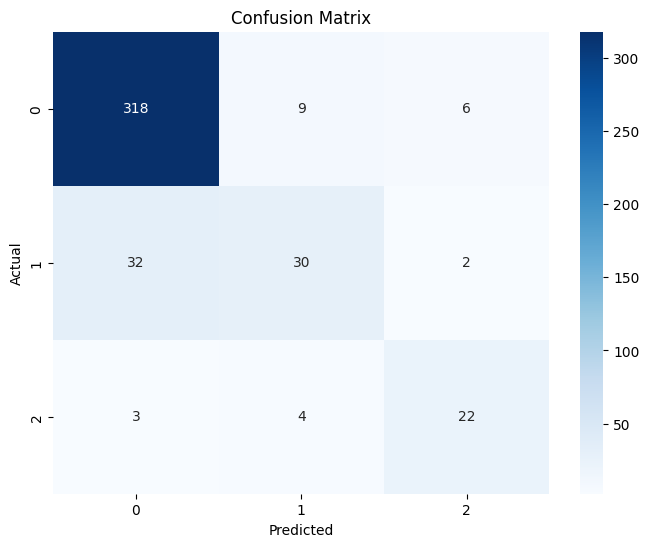

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

         1.0       0.90      0.95      0.93       333
         2.0       0.70      0.47      0.56        64
         3.0       0.73      0.76      0.75        29

    accuracy                           0.87       426
   macro avg       0.78      0.73      0.74       426
weighted avg       0.86      0.87      0.86       426



In [ ]:
accuracy_logistic=accuracy_score(y_test,yp)
print(accuracy_logistic)

0.8685446009389671


SVM

In [ ]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [ ]:
yp=sv.predict(x_test)
cm = confusion_matrix(y_test, yp)
print(cm)

[[321  10   2]
 [ 36  26   2]
 [  5   6  18]]


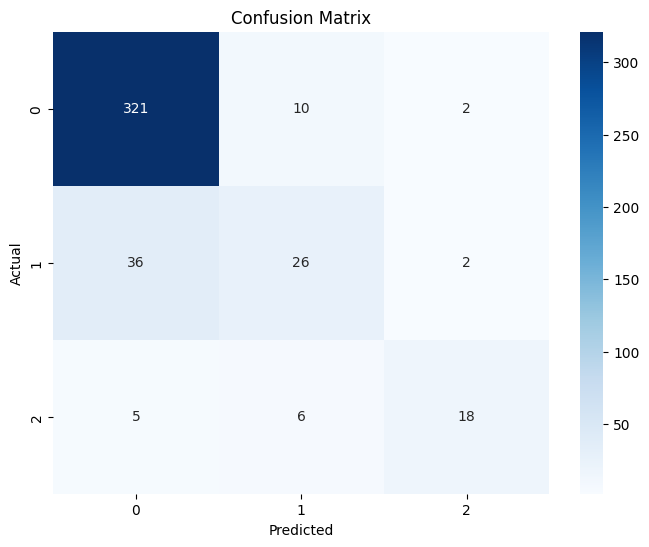

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

         1.0       0.89      0.96      0.92       333
         2.0       0.62      0.41      0.49        64
         3.0       0.82      0.62      0.71        29

    accuracy                           0.86       426
   macro avg       0.77      0.66      0.71       426
weighted avg       0.84      0.86      0.84       426



In [ ]:
accuracy_svc = accuracy_score(y_test,yp)
print(accuracy_svc)

0.8568075117370892


-BEFORE SMOTE - KNN

[[316  16   1]
 [ 28  36   0]
 [  4   5  20]]
              precision    recall  f1-score   support

         1.0       0.91      0.95      0.93       333
         2.0       0.63      0.56      0.60        64
         3.0       0.95      0.69      0.80        29

    accuracy                           0.87       426
   macro avg       0.83      0.73      0.77       426
weighted avg       0.87      0.87      0.87       426

0.8732394366197183


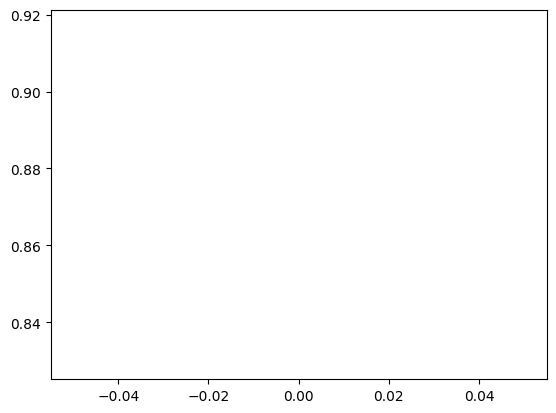

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

yp = knn.predict(x_test)
cm = confusion_matrix(y_test, yp)
print(cm)

print(classification_report(y_test, yp))

accuracy_knn = accuracy_score(y_test, yp)
print(accuracy_knn)
plt.plot(accuracy_knn)

AFTER RESAMPLING THE DATA

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X,Y= smote.fit_resample(x,y)

In [ ]:
for clo in X.columns:
  print(X[clo].describe())
  print()
  print()
  print()

count    4965.000000
mean      135.136439
std         9.898900
min       106.000000
25%       128.581834
50%       134.120615
75%       143.000000
max       160.000000
Name: baseline value, dtype: float64



count    4965.000000
mean        0.001543
std         0.002960
min         0.000000
25%         0.000000
50%         0.000000
75%         0.002000
max         0.019000
Name: accelerations, dtype: float64



count    4965.000000
mean        0.012571
std         0.051557
min         0.000000
25%         0.000000
50%         0.000736
75%         0.003908
max         0.481000
Name: fetal_movement, dtype: float64



count    4965.000000
mean        0.003673
std         0.003110
min         0.000000
25%         0.000601
50%         0.003367
75%         0.006000
max         0.015000
Name: uterine_contractions, dtype: float64



count    4965.000000
mean        0.002064
std         0.003184
min         0.000000
25%         0.000000
50%         0.000000
75%         0.003000
max         0.01

In [ ]:
for clo in X.columns:
  print(X[clo].value_counts())
  print()
  print()
  print()

baseline value
133.000000    315
120.000000    193
130.000000    160
138.000000    154
128.000000    144
             ... 
138.206421      1
139.392855      1
144.658345      1
142.712536      1
139.866381      1
Name: count, Length: 1799, dtype: int64



accelerations
0.000000    3113
0.001000     224
0.002000     187
0.003000     177
0.004000     126
            ... 
0.000868       1
0.000719       1
0.000813       1
0.004887       1
0.003338       1
Name: count, Length: 507, dtype: int64



fetal_movement
0.000000    2214
0.001000     297
0.002000     190
0.003000     105
0.004000      57
            ... 
0.000055       1
0.001581       1
0.003956       1
0.009041       1
0.017504       1
Name: count, Length: 1777, dtype: int64



uterine_contractions
0.000000    1045
0.005000     335
0.006000     307
0.004000     259
0.003000     257
            ... 
0.000107       1
0.001751       1
0.000911       1
0.005616       1
0.000573       1
Name: count, Length: 1810, dtype: int64



light

In [ ]:
for clo in X.columns:
  print(X[clo].unique())
  print()
  print()
  print()

[120.         132.         133.         ... 131.62031417 148.80067427
 139.86638115]



[0.00000000e+00 6.00000000e-03 3.00000000e-03 7.00000000e-03
 1.00000000e-03 5.00000000e-03 9.00000000e-03 2.00000000e-03
 8.00000000e-03 4.00000000e-03 1.00000000e-02 1.50000000e-02
 1.30000000e-02 1.40000000e-02 1.10000000e-02 1.70000000e-02
 1.20000000e-02 1.60000000e-02 1.90000000e-02 1.80000000e-02
 6.71110307e-04 3.36830892e-04 2.88836055e-04 1.15206466e-03
 1.16659073e-03 1.92646653e-03 8.60414539e-04 1.04149038e-04
 1.78855140e-05 2.04167309e-04 1.67826892e-04 7.08054737e-04
 7.20501790e-05 1.11722746e-03 5.36346943e-04 1.14094660e-03
 4.51382311e-04 6.33635840e-04 2.83855851e-04 5.93499009e-04
 9.72937140e-04 1.39936375e-03 1.59865416e-03 1.99922236e-03
 9.88694145e-04 9.35330624e-04 4.36046607e-04 7.89313134e-04
 2.65089157e-03 4.84812972e-04 9.49712406e-04 1.65934280e-03
 1.17025100e-03 7.26860626e-04 1.03401916e-03 2.83135643e-04
 1.20220997e-03 3.23582576e-04 4.94934889e-04 1.80185645e-

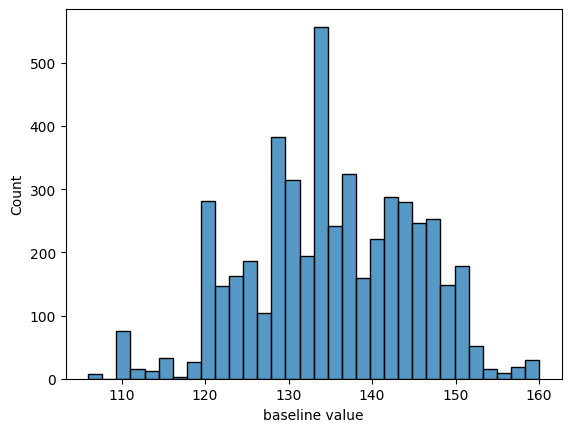

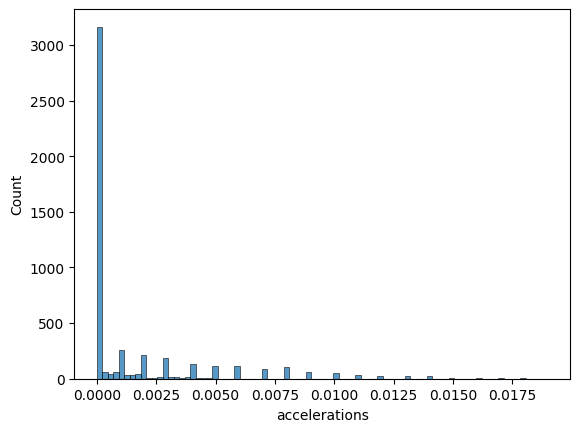

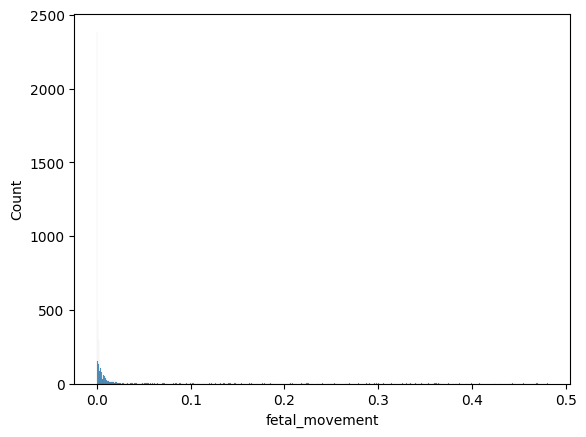

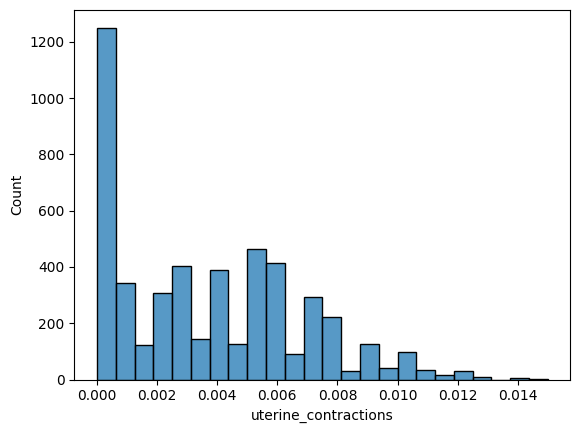

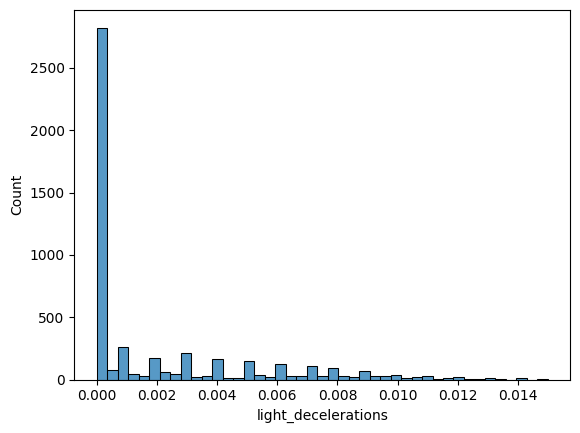

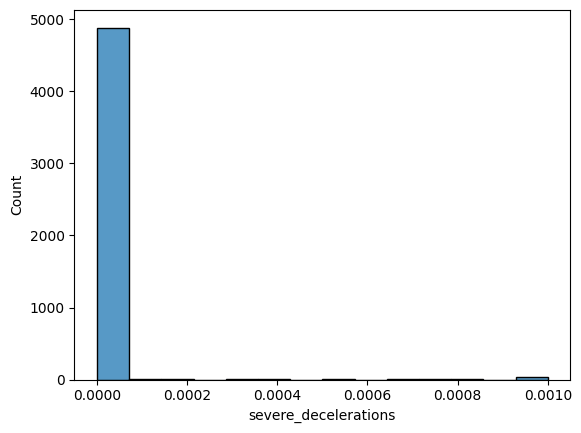

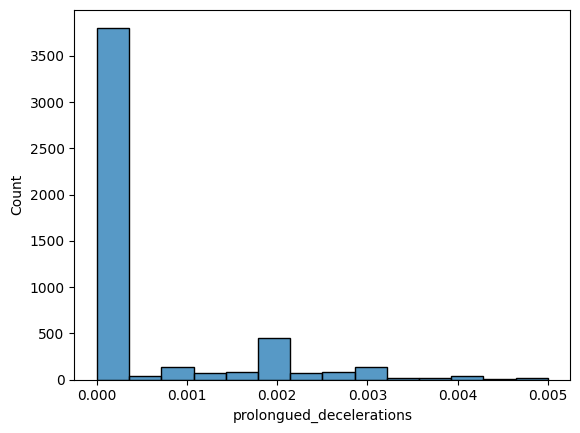

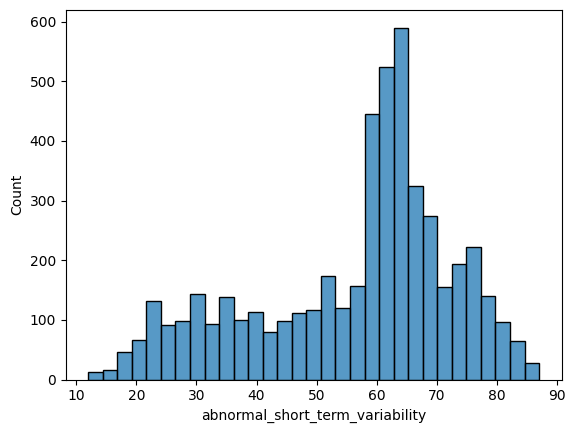

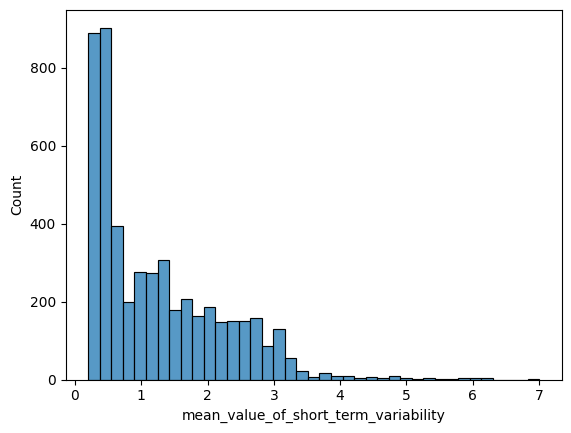

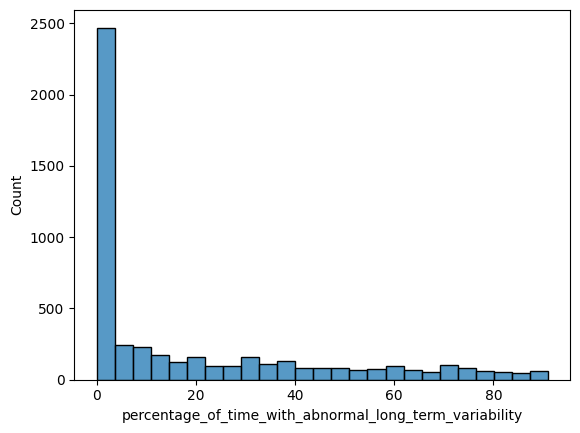

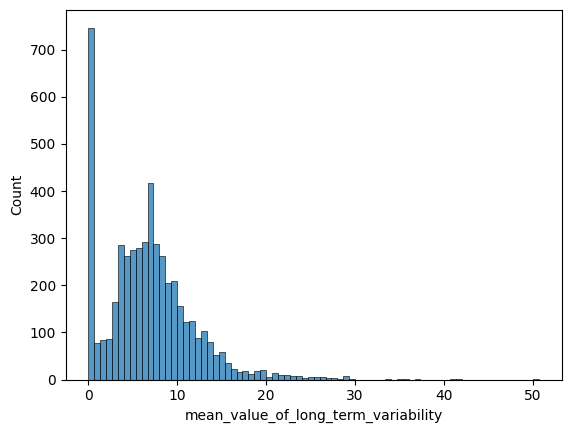

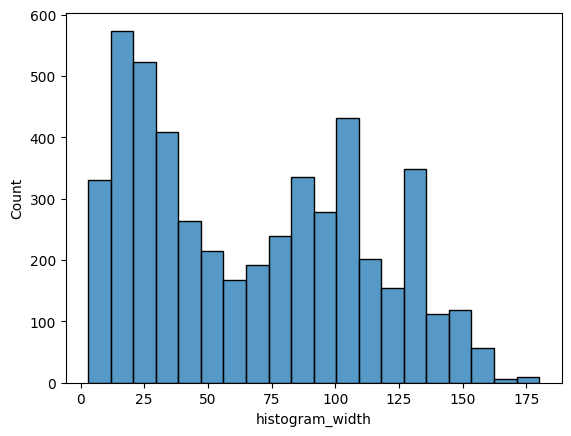

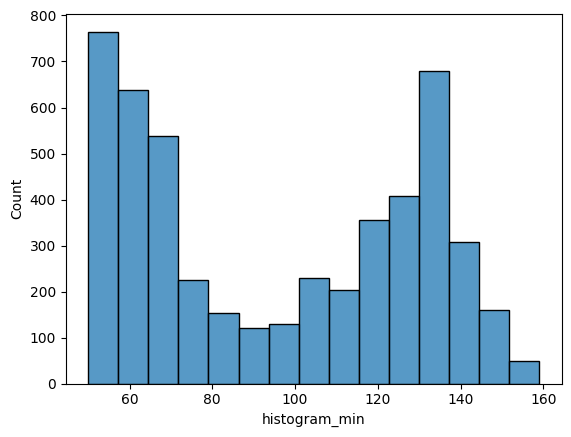

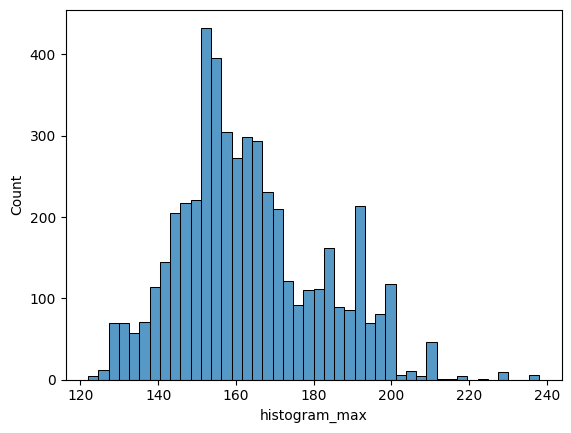

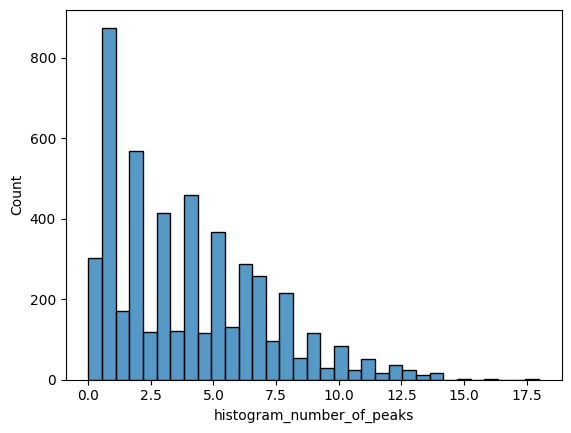

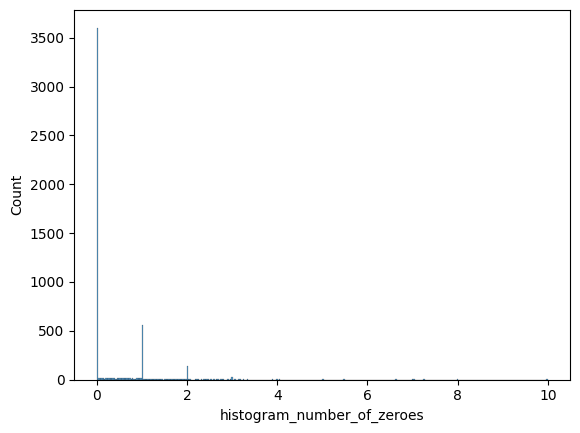

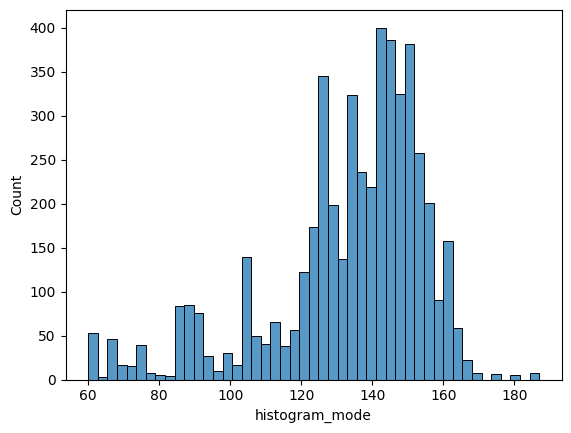

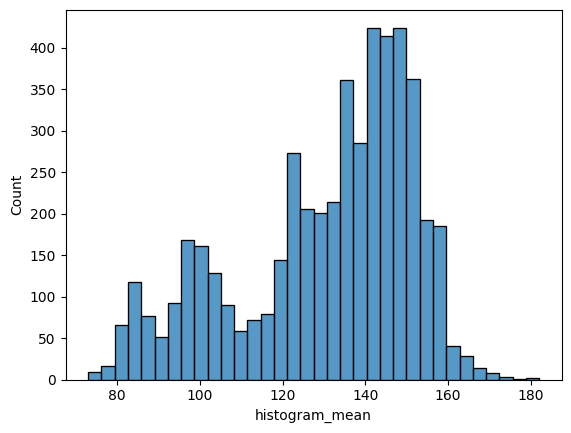

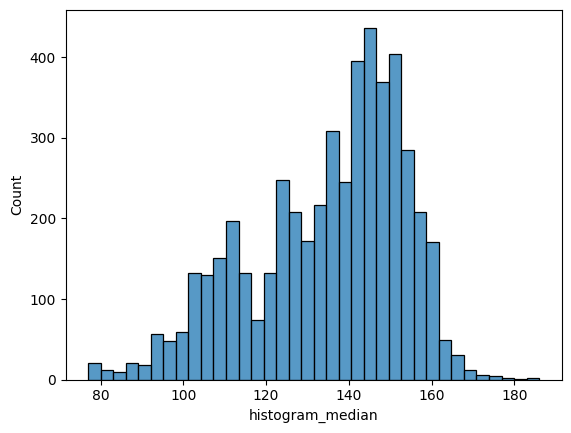

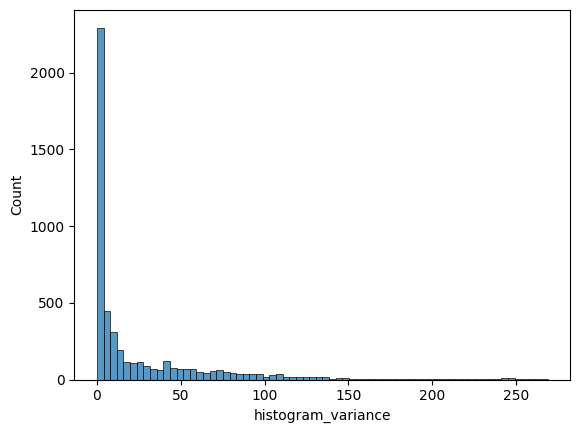

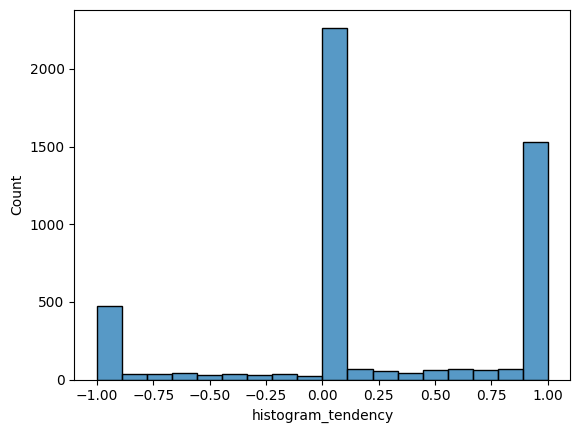

In [ ]:
for clo in X.columns:
  if X[clo].dtype == 'int64':
    sns.histplot(X[clo], discrete=True)
  elif X[clo].dtype == 'float64':
    sns.histplot(X[clo])

  plt.show()

In [ ]:
Y.value_counts()

,count
fetal_health,
2.0,1655
1.0,1655
3.0,1655


In [ ]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4965 entries, 0 to 4964
Series name: fetal_health
Non-Null Count  Dtype  
--------------  -----  
4965 non-null   float64
dtypes: float64(1)
memory usage: 38.9 KB


In [ ]:
Y.describe()

,fetal_health
count,4965.000000
mean,2.000000
std,0.816579
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,3.000000


SPLITTING THE DATA

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [ ]:
x_train

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
2414,133.431098,0.000000,0.000000,0.006811,0.000027,0.000000,0.000000,59.946113,0.716166,57.865282,...,127.946113,71.622789,199.568902,8.107774,1.000000,133.458042,132.431098,134.458042,2.161662,0.026944
2215,144.000000,0.000000,0.002027,0.000000,0.000514,0.000000,0.000000,55.623728,0.843126,8.458757,...,112.431262,63.807534,176.238796,5.917515,0.000000,148.376272,149.972505,150.945010,8.054990,1.000000
4547,145.824240,0.000000,0.003000,0.000000,0.000000,0.000000,0.000000,80.859392,0.203515,67.175760,...,12.859392,137.035152,149.894544,1.000000,0.000000,145.929696,143.964848,145.964848,0.964848,0.035152
80,145.000000,0.000000,0.002000,0.002000,0.000000,0.000000,0.000000,34.000000,1.700000,0.000000,...,109.000000,57.000000,166.000000,5.000000,1.000000,150.000000,147.000000,150.000000,10.000000,1.000000
803,146.000000,0.000000,0.000000,0.005000,0.008000,0.000000,0.000000,27.000000,1.900000,15.000000,...,81.000000,86.000000,167.000000,5.000000,0.000000,151.000000,140.000000,145.000000,31.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,131.518100,0.000000,0.000123,0.003877,0.004741,0.000123,0.003506,63.617458,1.924698,0.000000,...,103.753017,61.135558,164.888575,4.753017,0.123492,75.765083,91.271117,90.765083,75.111425,-1.000000
466,144.000000,0.000000,0.001000,0.001000,0.000000,0.000000,0.000000,83.000000,0.300000,31.000000,...,38.000000,132.000000,170.000000,2.000000,0.000000,144.000000,144.000000,145.000000,0.000000,-1.000000
3092,143.175106,0.000000,0.015700,0.000000,0.000000,0.000000,0.000000,74.625177,0.400000,62.649787,...,80.175106,70.450071,150.625177,2.725035,0.000000,144.725035,143.450071,145.450071,2.000000,1.000000
3772,133.658256,0.001975,0.000342,0.002050,0.000342,0.000000,0.003975,62.633022,2.178442,0.000000,...,110.924300,63.949533,174.873834,6.341744,0.658256,89.708722,99.974767,103.708722,77.405923,-0.658256


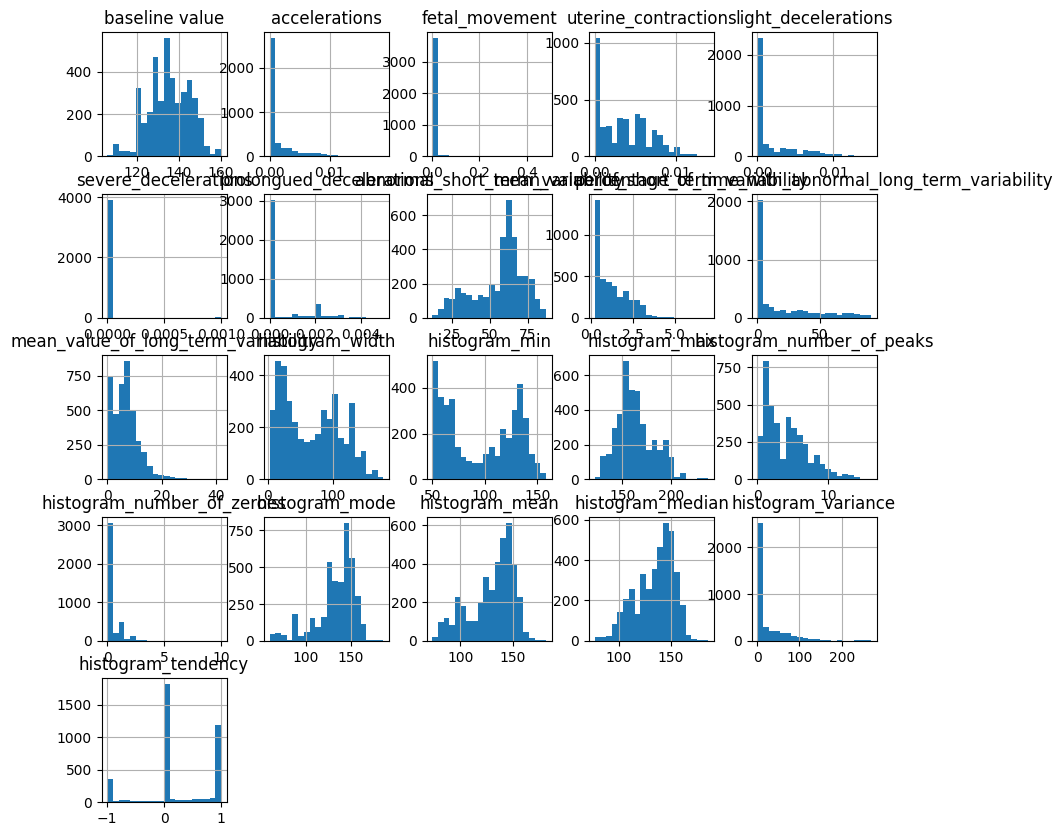

In [ ]:
x_train.hist(bins=20, figsize=(10,10))
plt.show()

PERCEPTRON

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay,roc_curve,auc,precision_recall_curve

In [ ]:
from sklearn.linear_model import Perceptron
pm=Perceptron()
pm.fit(x_train,y_train)

Perceptron()

In [ ]:
yp=pm.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test,yp)
print(cm)

[[140 190  23]
 [  4 284  29]
 [  1  42 280]]


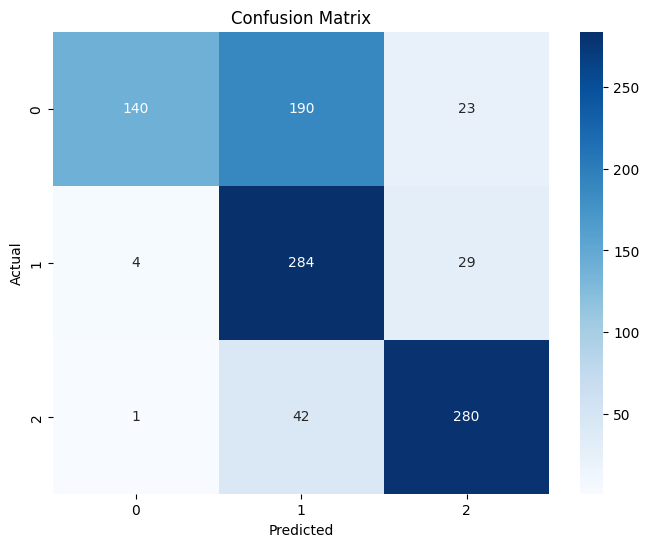

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

         1.0       0.97      0.40      0.56       353
         2.0       0.55      0.90      0.68       317
         3.0       0.84      0.87      0.85       323

    accuracy                           0.71       993
   macro avg       0.79      0.72      0.70       993
weighted avg       0.79      0.71      0.70       993



In [ ]:
accuracy_perceptron = accuracy_score(y_test,yp)
print(accuracy_perceptron)

0.7089627391742196


LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
yp = lr.predict(x_test)


In [ ]:
cm = confusion_matrix(y_test, yp)
print(cm)

[[270  72  11]
 [ 44 247  26]
 [  5  40 278]]


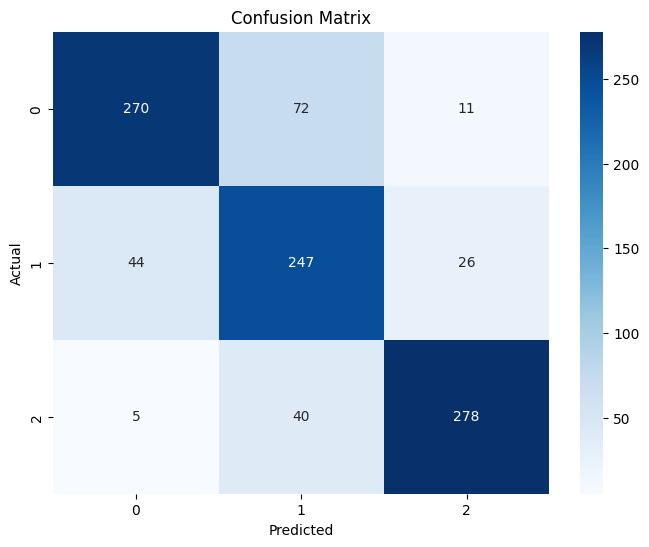

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

         1.0       0.85      0.76      0.80       353
         2.0       0.69      0.78      0.73       317
         3.0       0.88      0.86      0.87       323

    accuracy                           0.80       993
   macro avg       0.81      0.80      0.80       993
weighted avg       0.81      0.80      0.80       993



In [ ]:
accuracy_logistic=accuracy_score(y_test,yp)
print(accuracy_logistic)

0.8006042296072508


SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [ ]:
yp=sv.predict(x_test)
cm = confusion_matrix(y_test, yp)
print(cm)

[[277  67   9]
 [ 17 283  17]
 [  8  39 276]]


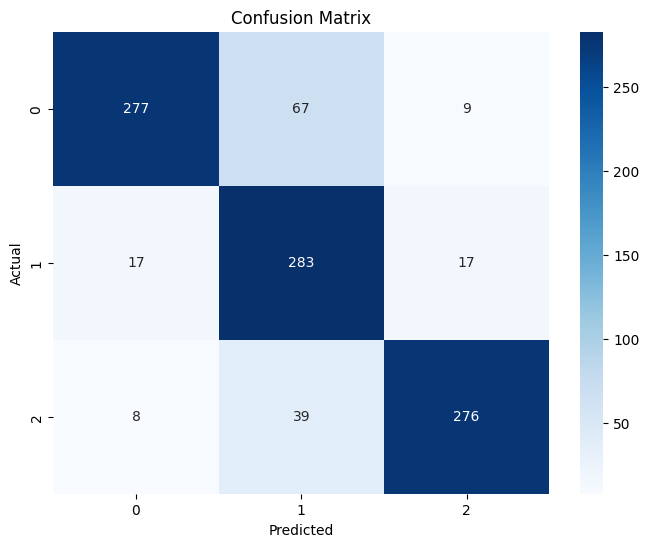

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

         1.0       0.92      0.78      0.85       353
         2.0       0.73      0.89      0.80       317
         3.0       0.91      0.85      0.88       323

    accuracy                           0.84       993
   macro avg       0.85      0.84      0.84       993
weighted avg       0.86      0.84      0.84       993



In [ ]:
accuracy_svc = accuracy_score(y_test,yp)
print(accuracy_svc)

0.8418932527693856


kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

yp = knn.predict(x_test)
cm = confusion_matrix(y_test, yp)
print(cm)

print(classification_report(y_test, yp))

accuracy_knn = accuracy_score(y_test, yp)
print(accuracy_knn)

[[297  51   5]
 [  4 306   7]
 [  0  10 313]]
              precision    recall  f1-score   support

         1.0       0.99      0.84      0.91       353
         2.0       0.83      0.97      0.89       317
         3.0       0.96      0.97      0.97       323

    accuracy                           0.92       993
   macro avg       0.93      0.93      0.92       993
weighted avg       0.93      0.92      0.92       993

0.9224572004028198


BOOTSTRAPING

In [ ]:
from sklearn.utils import resample
def bootstrapping(x_train,y_train):
    x_train_boot, y_train_boot = resample(x_train, y_train, replace=True, n_samples=len(x_train), random_state=42)
    return x_train_boot,y_train_boot

In [ ]:
x_train_boot,y_train_boot= bootstrapping(x_train,y_train)

PERCEPTRON

In [ ]:
from sklearn.linear_model import Perceptron
pm=Perceptron()
pm.fit(x_train,y_train)

Perceptron()

In [ ]:
yp=pm.predict(x_test)


from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,yp))

[[140 190  23]
 [  4 284  29]
 [  1  42 280]]


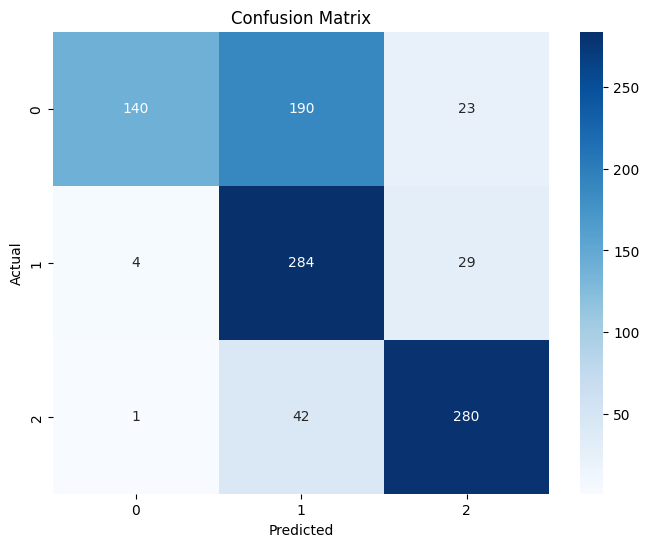

In [ ]:
cm = confusion_matrix(y_test, yp)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

         1.0       0.97      0.40      0.56       353
         2.0       0.55      0.90      0.68       317
         3.0       0.84      0.87      0.85       323

    accuracy                           0.71       993
   macro avg       0.79      0.72      0.70       993
weighted avg       0.79      0.71      0.70       993



In [ ]:

print(accuracy_score(y_test,yp))

0.7089627391742196


LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
yp = lr.predict(x_test)


from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,yp))

[[270  72  11]
 [ 44 247  26]
 [  5  40 278]]


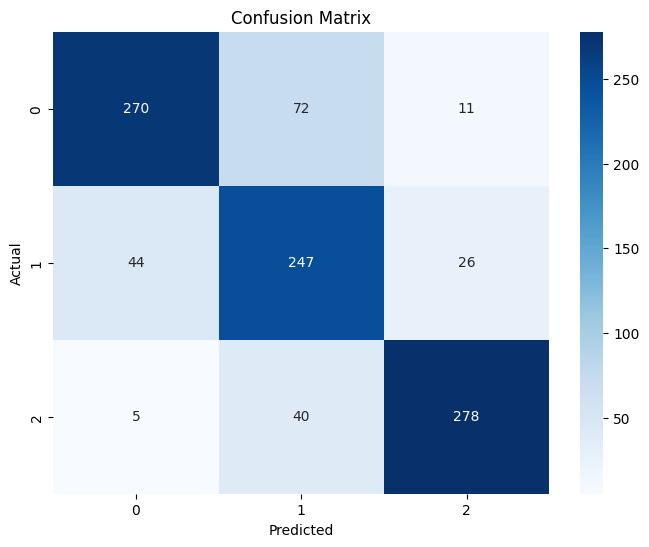

In [ ]:
cm = confusion_matrix(y_test, yp)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

         1.0       0.85      0.76      0.80       353
         2.0       0.69      0.78      0.73       317
         3.0       0.88      0.86      0.87       323

    accuracy                           0.80       993
   macro avg       0.81      0.80      0.80       993
weighted avg       0.81      0.80      0.80       993



In [ ]:
print(accuracy_score(y_test,yp))

0.8006042296072508


SVM

In [ ]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [ ]:
yp=sv.predict(x_test)


from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,yp))

[[277  67   9]
 [ 17 283  17]
 [  8  39 276]]


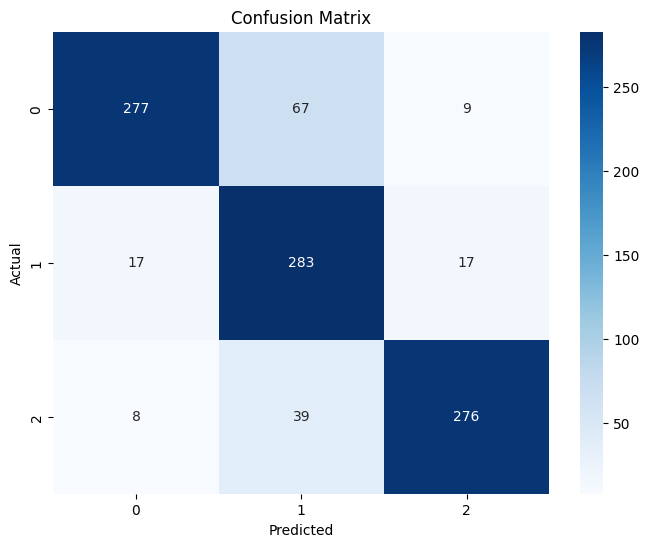

In [ ]:
cm = confusion_matrix(y_test, yp)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

         1.0       0.92      0.78      0.85       353
         2.0       0.73      0.89      0.80       317
         3.0       0.91      0.85      0.88       323

    accuracy                           0.84       993
   macro avg       0.85      0.84      0.84       993
weighted avg       0.86      0.84      0.84       993



In [ ]:
print(accuracy_score(y_test,yp))

0.8418932527693856


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

yp = knn.predict(x_test)
cm = confusion_matrix(y_test, yp)
print(cm)

print(classification_report(y_test, yp))

accuracy_knn = accuracy_score(y_test, yp)
print(accuracy_knn)

[[297  51   5]
 [  4 306   7]
 [  0  10 313]]
              precision    recall  f1-score   support

         1.0       0.99      0.84      0.91       353
         2.0       0.83      0.97      0.89       317
         3.0       0.96      0.97      0.97       323

    accuracy                           0.92       993
   macro avg       0.93      0.93      0.92       993
weighted avg       0.93      0.92      0.92       993

0.9224572004028198


COMPARISION

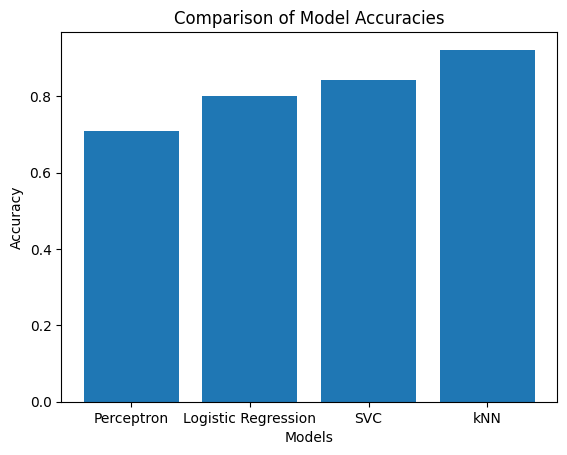

In [ ]:
model_names = ['Perceptron', 'Logistic Regression', 'SVC','kNN']
accuracies = [accuracy_perceptron, accuracy_logistic, accuracy_svc]

accuracies = [accuracy_perceptron, accuracy_logistic, accuracy_svc, accuracy_knn]

plt.bar(model_names, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()

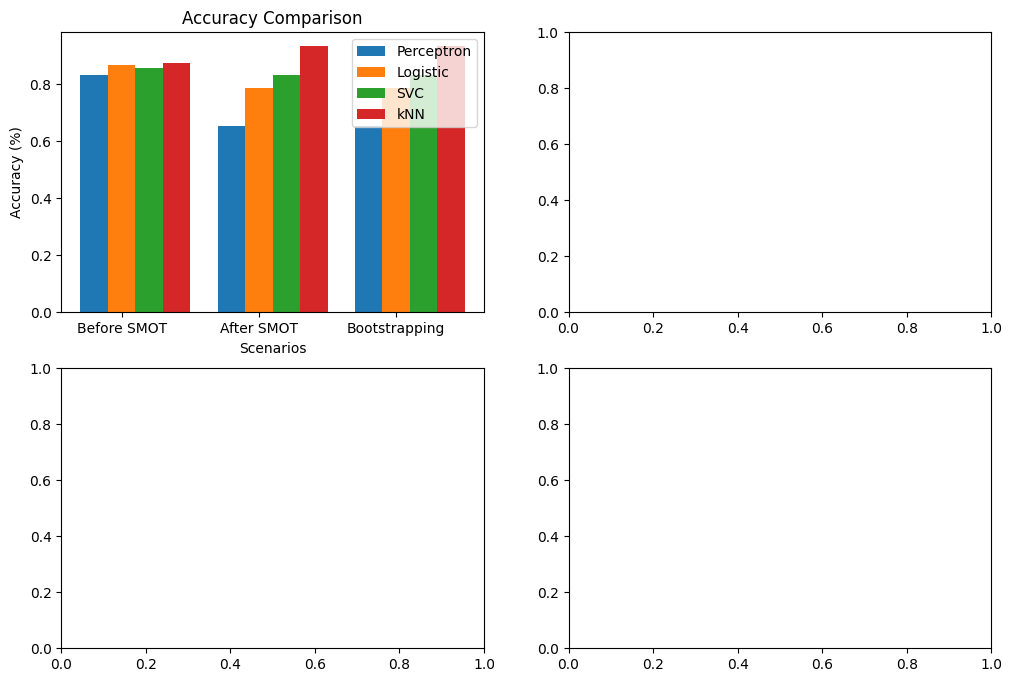

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example Data
scenarios = ['Before SMOT', 'After SMOT', 'Bootstrapping']
models = ['Perceptron', 'Logistic', 'SVC', 'kNN'] # Or change the accuracies dict key to 'KNN' to match.
accuracies = {
    'Perceptron': [0.8333333333333334, 0.6535750251762337, 0.6535750251762337],
    'Logistic': [0.8685446009389671, 0.7865055387713998, 0.7865055387713998],
    'SVC': [0.8568075117370892, 0.8328298086606244, 0.8328298086606244],
    'kNN': [0.8732394366197183, 0.9355488418932527, 0.9355488418932527]
}
residuals = {
    'Perceptron': np.random.randn(100),
    'Logistic': np.random.randn(100),
    'SVC': np.random.randn(100),
    'kNN': np.random.randn(100)
}

# Accuracy Bar Chart
x = np.arange(len(scenarios))
width = 0.2

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
ax1 = axes[0, 0]
for i, model in enumerate(models):
    ax1.bar(x + i * width, accuracies[model], width, label=model) # Access the correct key in the accuracies dictionary.


ax1.set_xlabel('Scenarios')
ax1.set_ylabel('Accuracy (%)')
ax1.set_title('Accuracy Comparison')
ax1.set_xticks(x + width)
ax1.set_xticklabels(scenarios)
ax1.legend()